In [15]:
import pandas as pd
import numpy as np
import seaborn as sb
import pandas_profiling
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')

In [10]:
df.profile_report()

In [11]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
chest_pain = df.groupby(by='cp').median().reset_index()
chest_pain

cp   age  sex  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   0  57.0  1.0     130.0  248.0  0.0      0.0    143.0    1.0      1.2   
1   1  52.0  1.0     128.0  238.0  0.0      1.0    163.5    0.0      0.0   
2   2  53.0  1.0     130.0  233.0  0.0      1.0    158.0    0.0      0.5   
3   3  59.0  1.0     140.0  234.0  0.0      0.0    159.0    0.0      1.2   

   slope   ca  thal  target  
0    1.0  1.0   3.0     0.0  
1    2.0  0.0   2.0     1.0  
2    2.0  0.0   2.0     1.0  
3    1.0  0.0   2.0     1.0

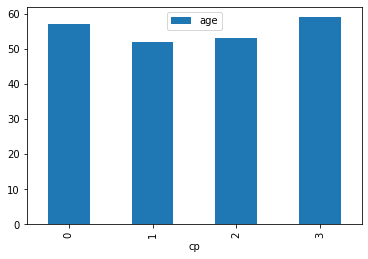

In [12]:
chest_pain.plot.bar(x='cp', y='age')

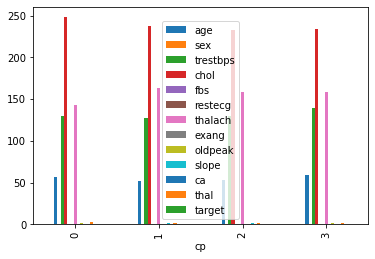

In [13]:
chest_pain.plot.bar(x='cp')

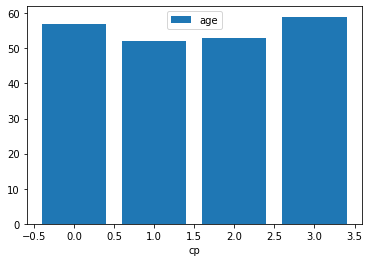

In [16]:
fig, ax = plt.subplots()
ax.bar(chest_pain['cp'], chest_pain['age'], label='age')
ax.set_xlabel('cp')
ax.legend();

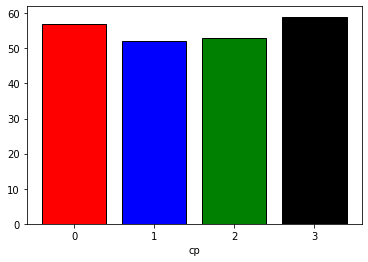

In [17]:
fig, ax = plt.subplots()
ax.bar(chest_pain['cp'], chest_pain['age'], label='age',
      edgecolor='k', color=['red','blue','green','black'])
ax.set_xlabel('cp')
ax.set_xticks(chest_pain['cp'])

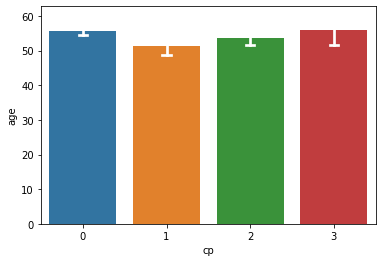

In [18]:
ax = sb.barplot('cp', 'age', errcolor='w', capsize=0.1, data=df)

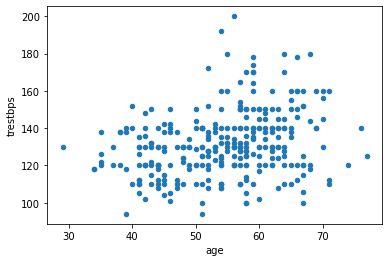

In [19]:
df.plot.scatter('age','trestbps')

Text(0, 0.5, 'trestbps')

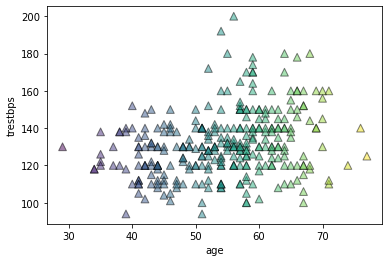

In [20]:
fig, ax = plt.subplots()
ax.scatter(df['age'], df['trestbps'], marker='^',
          s=60, c=df['age'], edgecolors='k', alpha=0.5)
ax.set_xlabel('age')
ax.set_ylabel('trestbps')

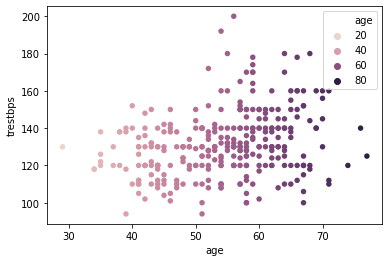

In [23]:
sb.scatterplot('age', 'trestbps', hue='age', s=30, edgecolor='none', data=df)

In [25]:
ages = df.groupby('age').median().reset_index()
ages.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   29  1.0  1.0     130.0  204.0  0.0      0.0    202.0    0.0     0.00   
1   34  0.5  2.0     118.0  196.0  0.0      0.5    183.0    0.0     0.35   
2   35  1.0  0.0     124.0  195.0  0.0      1.0    165.0    0.5     0.70   
3   37  0.5  2.0     125.0  232.5  0.0      1.0    178.5    0.0     1.75   
4   38  1.0  2.0     138.0  175.0  0.0      1.0    173.0    0.0     0.00   

   slope   ca  thal  target  
0    2.0  0.0   2.0     1.0  
1    2.0  0.0   2.0     1.0  
2    2.0  0.0   2.5     0.5  
3    1.0  0.0   2.0     1.0  
4    2.0  4.0   2.0     1.0

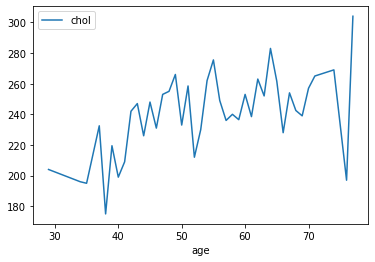

In [26]:
ages.plot.line('age', 'chol')

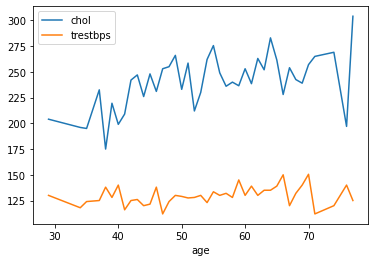

In [27]:
ages.plot.line('age', ['chol','trestbps'])

Text(0, 0.5, 'trestbps')

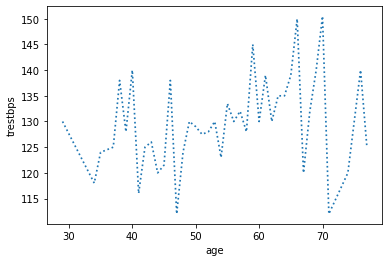

In [28]:
fig, ax = plt.subplots()
ax.plot(ages['age'], ages['trestbps'], ls=':',lw=1.7)
ax.set_xlabel('age')
ax.set_ylabel('trestbps')

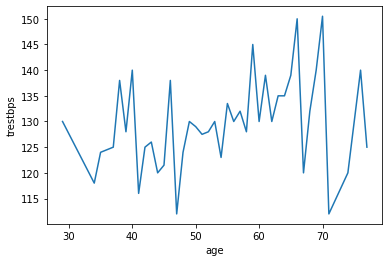

In [29]:
sb.lineplot('age','trestbps',data=ages)

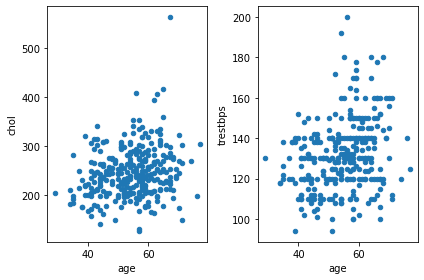

In [31]:
fig, axes = plt.subplots(ncols=2)
df.plot.scatter(x='age', y='chol', ax=axes[0])
df.plot.scatter(x='age', y='trestbps', ax=axes[1])
fig.tight_layout()

In [32]:
fig2 = axes[0].get_figure()

In [34]:
fig2.savefig('plots.png', bbox_inches='tight', transparent=True)

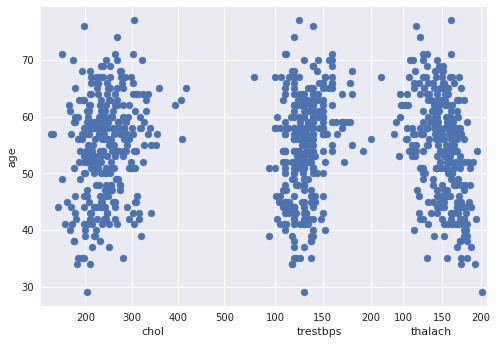

In [37]:
with plt.style.context('seaborn'):
    fig, axes = plt.subplots(ncols=3, sharey=True,
                            gridspec_kw={'width_ratios': [2,1,1], 'wspace':0})
    y = 'age'
    xs = ['chol', 'trestbps', 'thalach']
    for x, ax in zip(xs, axes):
        ax.scatter(df[x], df[y])
        ax.set_xlabel(x)
    axes[0].set_ylabel(y)
fig.savefig('output.png', dpi=100, bbox_inches='tight')
fig.savefig('output.pdf', dpi=100, bbox_inches='tight')

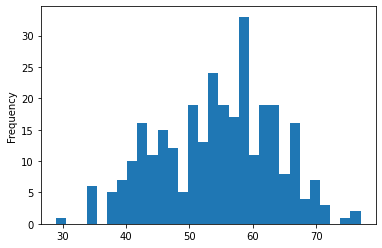

In [38]:
df.age.plot.hist(bins=30)

(array([ 1.,  0.,  0.,  6.,  0.,  5.,  7., 10., 16., 11., 15., 12.,  5.,
        19., 13., 24., 19., 17., 33., 11., 19., 19.,  8., 16.,  4.,  7.,
         3.,  0.,  1.,  2.]),
 array([29. , 30.6, 32.2, 33.8, 35.4, 37. , 38.6, 40.2, 41.8, 43.4, 45. ,
        46.6, 48.2, 49.8, 51.4, 53. , 54.6, 56.2, 57.8, 59.4, 61. , 62.6,
        64.2, 65.8, 67.4, 69. , 70.6, 72.2, 73.8, 75.4, 77. ]),
 <a list of 30 Patch objects>)

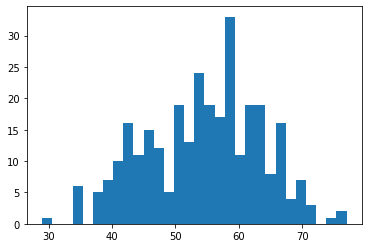

In [39]:
plt.hist(df.age, bins=30)

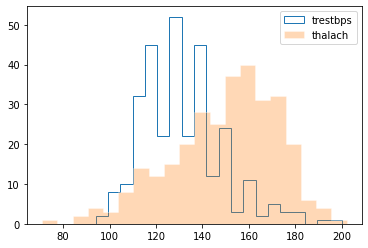

In [42]:
fig, ax = plt.subplots()
ax.hist(df.trestbps, bins=20, histtype='step', label='trestbps')
ax.hist(df.thalach, bins=20, histtype='stepfilled', label='thalach', alpha=0.3, edgecolor='w')
ax.legend()

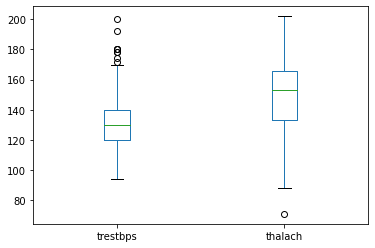

In [43]:
df[['trestbps','thalach']].plot.box()

In [44]:
df[['trestbps','thalach']].describe()

trestbps     thalach
count  303.000000  303.000000
mean   131.623762  149.646865
std     17.538143   22.905161
min     94.000000   71.000000
25%    120.000000  133.500000
50%    130.000000  153.000000
75%    140.000000  166.000000
max    200.000000  202.000000

{'whiskers': [<matplotlib.lines.Line2D at 0x1e34cde7580>,
 'caps': [<matplotlib.lines.Line2D at 0x1e34cde7a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e34cde7220>,
 'medians': [<matplotlib.lines.Line2D at 0x1e34cdfe130>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e34cdfe400>,
 'means': []}

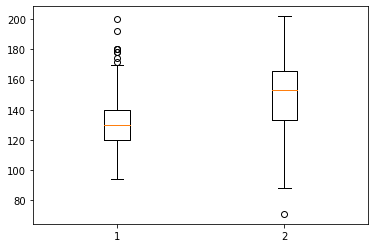

In [46]:
plt.boxplot(df[['trestbps', 'thalach']].to_numpy())

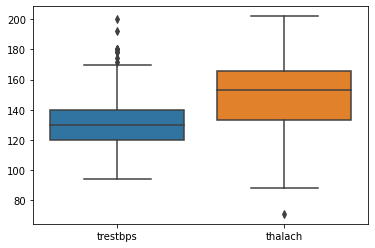

In [47]:
sb.boxplot(data=df[['trestbps', 'thalach']])

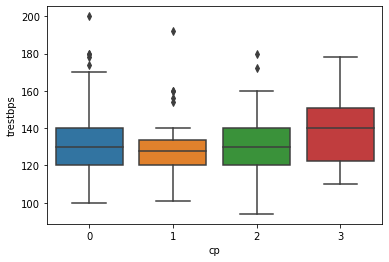

In [49]:
sb.boxplot(x='cp',y='trestbps',data=df)

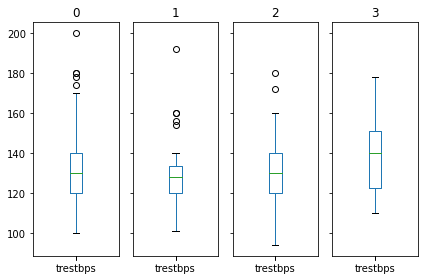

In [51]:
df.groupby('cp').boxplot(column='trestbps', sharex=True, layout=(1,4), grid=False)
plt.tight_layout()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e3468a4df0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e34b7ce5e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e34cf044f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e34b883820>}

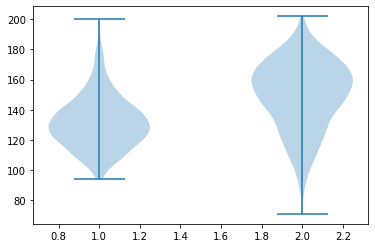

In [52]:
fig, ax = plt.subplots()
ax.violinplot(df[['trestbps','thalach']].to_numpy())

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e34b8a7ca0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e34bc8e520>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e34cf21e20>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e34a04f0d0>}

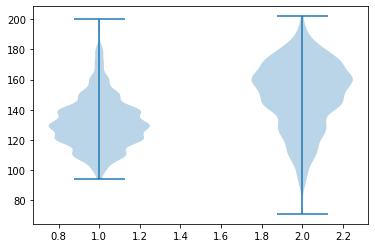

In [53]:
fig, ax = plt.subplots()
ax.violinplot(df[['trestbps','thalach']].to_numpy(), bw_method=0.2)

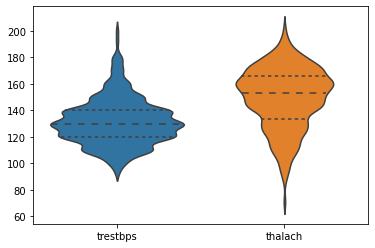

In [56]:
sb.violinplot(data=df[['trestbps','thalach']], inner='quartile', bw=0.2)

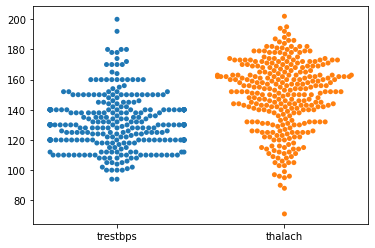

In [60]:
sb.swarmplot(data=df[['trestbps','thalach']], size=5)

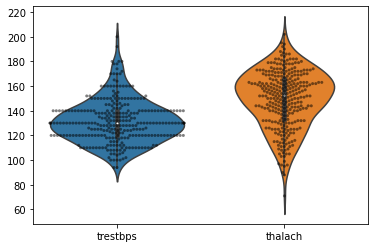

In [68]:
sb.violinplot(data=df[['trestbps','thalach']])
sb.swarmplot(data=df[['trestbps','thalach']], size=3, color='k',alpha=0.5)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

In [37]:
df = pd.read_csv('meteorite-landings.csv')
df.head()

name   id nametype     recclass      mass  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong               GeoLocation  
0    6.08333     (50.775000, 6.083330)  
1   10.23333    (56.183330, 10.233330)  
2 -113.00000  (54.216670, -113.000000)  
3  -99.90000   (16.883330, -99.900000)  
4  -64.95000  (-33.166670, -64.950000)

In [38]:
df.dropna(subset=['reclong','reclat'])
df = df[df.reclong < 300]

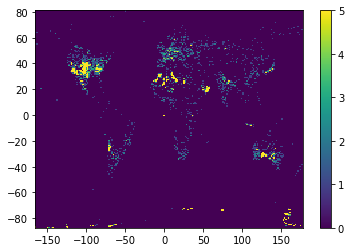

In [39]:
plt.hist2d(df.reclong, df.reclat, bins=200, vmax=5)
plt.colorbar()

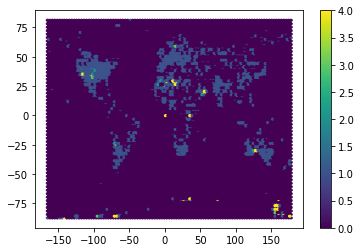

In [42]:
plt.hexbin(df.reclong, df.reclat, bins=200, vmax=4, lw=1.0)
plt.colorbar()

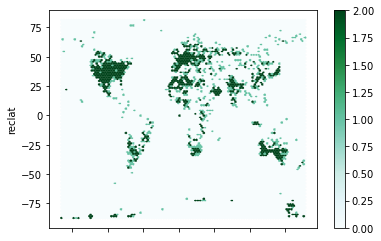

In [41]:
df.plot.hexbin(x='reclong', y='reclat', vmax=2, gridsize=100, linewidth=0.25 )

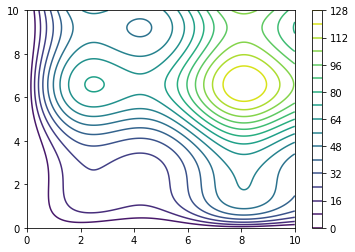

In [56]:
spacing = np.linspace(0, 10, 200)
X, Y =  np.meshgrid(spacing, spacing)
Z = (np.sin(X)+np.cos(Y)+2*np.arcsinh(X*Y))**2
plt.contour(X, Y, Z, levels=20)
plt.colorbar()

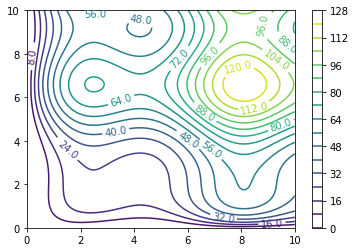

In [57]:
c = plt.contour(X, Y, Z, levels=20)
plt.clabel(c, inline=True, fmt='%0.1f')
plt.colorbar()

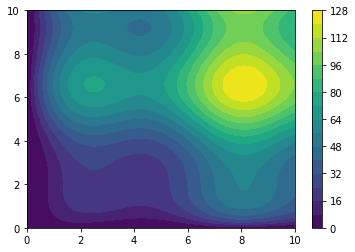

In [58]:
c = plt.contourf(X, Y, Z, levels=20)
plt.colorbar()

<a list of 9 text.Text objects>

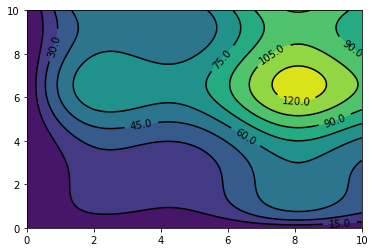

In [59]:
plt.contourf(X, Y, Z, levels=10)
c = plt.contour(X, Y, Z, levels=10, colors='black')
plt.clabel(c, inline=True, fmt='%0.1f')

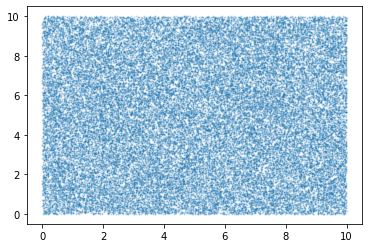

In [62]:
n = 50000
xs, ys = np.random.uniform(0,10,n), np.random.uniform(0,10,n)
zs = (np.sin(xs)+np.cos(ys)+2*np.arcsinh(xs*ys))**2
zs /= zs.max()
passed = np.random.uniform(0,1,n) <25
xs, ys = xs[passed], ys[passed] 
plt.scatter(xs, ys, s=1, alpha=0.2)

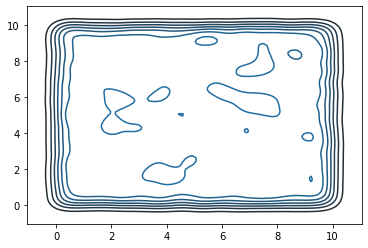

In [63]:
sb.kdeplot(xs, ys)

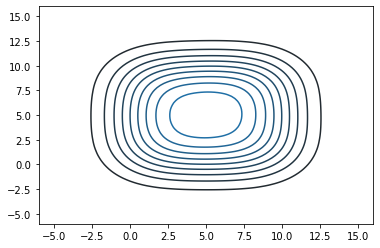

In [64]:
sb.kdeplot(xs, ys, bw=2)

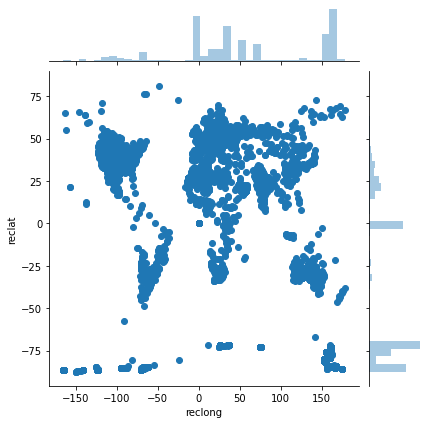

In [66]:
sb.jointplot(data=df, x='reclong', y='reclat')